# Проект "Принятие решений в бизнесе крупного интернет-магазина на основе данных"



Даннное иследование проводится на основе данных крупного интернет-магазина. 
Основной целью исследования является проанализировать список гипотез для увеличения выручки.
Задачами исследования являются: 
1. приоритизация гипотез;
2. запуск A/B-теста; 
3. проанализировать результаты.

### Загрузка данных и подготовка их к анализу

#### Загрузка данных из файла в датафрейм.

In [1]:
import pandas as pd
import scipy.stats as stats
from datetime import datetime, timedelta
import seaborn as sns
from collections import Counter
from scipy import stats as st
import time
from datetime import datetime
from datetime import date, timedelta as td
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings


In [2]:
try:
    hypothesi = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesi = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv') # гипотезы

In [3]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')  # заказы

In [4]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',') # визиты

#### Изучение общей информации о полученном датафрейме и  предобработка данных  

In [5]:
pd.set_option('display.max_colwidth', 0)
display(hypothesi.head)

<bound method NDFrame.head of                                                                                                      Hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
7  Добавить форму подписки на все основные страниц

In [6]:
hypothesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [7]:
#Переименуем строки и приведём и к нижниму регистру.
hypothesi.columns = [x.lower().replace(' ', '_') for x in hypothesi.columns.values]

In [8]:
hypothesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [9]:
#Проверим есть ли дубликаты.
hypothesi.duplicated().sum()

0

#### Изучение общей информации о полученном датафрейме и предобработка данных о заказах

In [10]:
orders.head

<bound method NDFrame.head of       transactionId   visitorId        date  revenue group
0     3667963787     3312258926  2019-08-15  1650     B   
1     2804400009     3642806036  2019-08-15  730      B   
2     2961555356     4069496402  2019-08-15  400      A   
3     3797467345     1196621759  2019-08-15  9759     B   
4     2282983706     2322279887  2019-08-15  2308     B   
...          ...            ...         ...   ...    ..   
1192  2662137336     3733762160  2019-08-14  6490     B   
1193  2203539145     370388673   2019-08-14  3190     A   
1194  1807773912     573423106   2019-08-14  10550    A   
1195  1947021204     1614305549  2019-08-14  100      A   
1196  3936777065     2108080724  2019-08-15  202740   B   

[1197 rows x 5 columns]>

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
# преобразуем данные о времени для дальнейших расчётов
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
#канал приведем к строковому типу
orders['group'] = orders['group'].astype(str)

In [14]:
#Проверим есть ли дубликаты.
orders.duplicated().sum()

0

In [15]:
# Изучем данные столбцов
orders['transactionId'].value_counts()

3667963787    1
4167421281    1
2875229767    1
504373597     1
2017680897    1
             ..
1853288890    1
2084190534    1
2956594374    1
3646798055    1
3936777065    1
Name: transactionId, Length: 1197, dtype: int64

In [16]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119    9 
2038680547    8 
199603092     5 
             .. 
2524310328    1 
2210805728    1 
2274825520    1 
1831227158    1 
2108080724    1 
Name: visitorId, Length: 1031, dtype: int64

Данные показывают 1031 уникального пользователя. Больше всего заказывает пользователи под номером 4256040402 и 245800165.

In [17]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Из данных видно, что максимальный заказ составил 1,295 млн рублей, что вероятно является аномалией. Стоимость среднего заказа составляет 2978 рублей. 

In [18]:
print('Количество заказов больше 1 млн. руб:', orders.query('revenue >1000000')['revenue'].count()) 

Количество заказов больше 1 млн. руб: 1


Если не будет влиять на результат анализа можно оставить.

In [19]:
display('Количество заказов больше 28000 руб:', orders.query('revenue >28000')['revenue'].count()) 

'Количество заказов больше 28000 руб:'

60

#### Изучение общей информации о полученном датафрейме и предобработка данных о визитах

In [20]:
# Изучение данных
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
# преобразуем данные о времени для дальнейших расчётов
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [23]:
visitors['date'].describe(datetime_is_numeric=True)

count    62                 
mean     2019-08-16 00:00:00
min      2019-08-01 00:00:00
25%      2019-08-08 06:00:00
50%      2019-08-16 00:00:00
75%      2019-08-23 18:00:00
max      2019-08-31 00:00:00
Name: date, dtype: object

In [24]:
#Проверим есть ли дубликаты.
orders.duplicated().sum()

0

#### Изучение состава групп

Определим сколько пользователей участвует в тесте.

In [25]:
orders['visitorId'].count()

1197

Всего участвует в тесте 1197 пользователей. Рассмотрим сколько пользователей в каждой группе

In [26]:
print('Количество пользователей в группе А -', orders.query('group == "A"')['visitorId'].count())

Количество пользователей в группе А - 557


In [27]:
print('Количество пользователей в группе B -', orders.query('group == "B"')['visitorId'].count())

Количество пользователей в группе B - 640


 Определим сколько пользователей попали одновременно в обе группы

In [28]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

В обе группы попали 58 пользователей. Заказы  пользователей попадают то в одну то в другую группу теста.

Далее создаем список этих 58 пользователей :

In [29]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
double_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [30]:
double_users_primer = orders.query('visitorId == 8300375')
double_users_primer



,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


Удалять их не требуется. Так как их нельзя корректно удалить из таблицы visitors.

### Часть 1. Приоритизация гипотез.


#### Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.


In [31]:

hypothesi['ICE'] = (hypothesi['impact'] * hypothesi['confidence']) /hypothesi['efforts']
hypothesi['ICE'] = hypothesi['ICE']
pd.set_option('display.max_colwidth', 0)
display(round(hypothesi[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),1))



,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


8 гипотеза самая перспективная. Затем идут гипотезы  0,7 и 6.

#### Применение фреймворка  RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [32]:
hypothesi['RICE'] = (hypothesi['reach'] *hypothesi['impact'] * hypothesi['confidence']) /hypothesi['efforts']
hypothesi['RICE'] = hypothesi['RICE']

pd.set_option('display.max_colwidth', 0)
display(hypothesi[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


 7 гипотеза самая перспективная. Затем идут гипотезы 2, 0 и 6.

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении RICE приоритетной гипотезой стала 7 вместо 8 при применении ICE. Так получилось потому что её параметр - охват пользователей по 10-балльной шкале равен 10, в то время у других гипотез он меньше.


### Часть 2. Анализ A/B-теста

#### Построение графика кумулятивной выручки по группам.  Выводы и предположения.

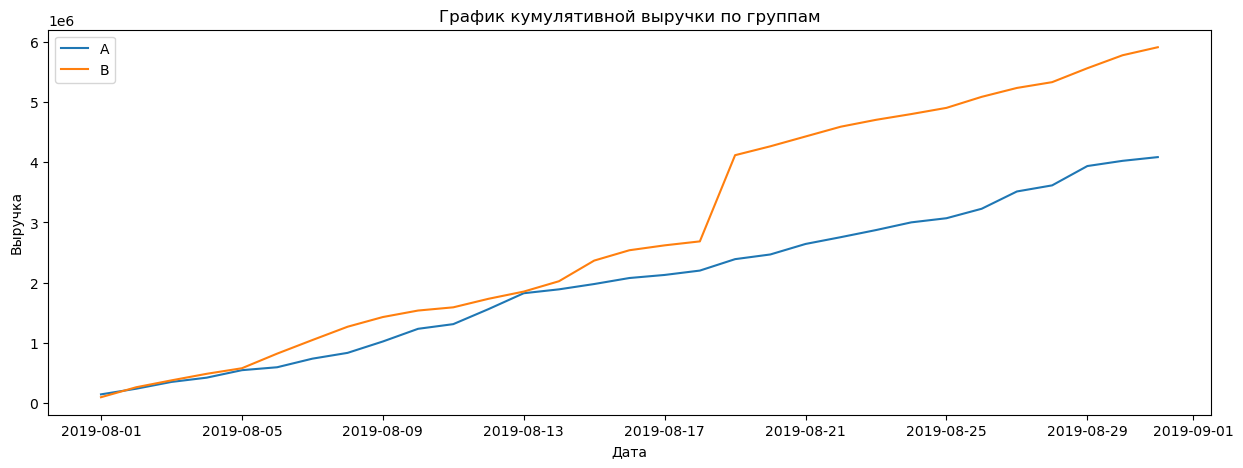

In [33]:
plt.rcParams ['figure.figsize'] = [15, 5]
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

           

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка');

Группа B практически всё время теста лидировала над группой А. Причём с середины заметно группа B вырвалась вперёд. Похоже аномально большие заказы всетки влияют на результаты. При заключительном анализе их нужно удалить.

#### Построение графика кумулятивного среднего чека по группам. Выводы и предположения

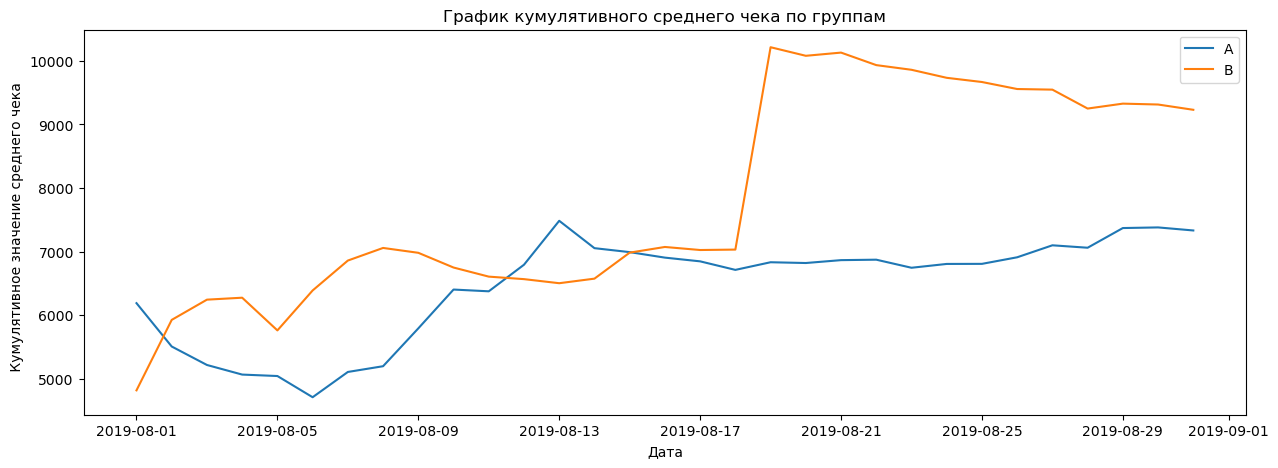

In [34]:


cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel(' Кумулятивное значение среднего чека   ');

Кумулятивное значение среднего чека заметно растёт в процессе теста для группы B начиная с середины. Недоходя середины кумулятивное значение среднего чека по группе А заметно вырывается вперед и затем к середине угасает. 

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

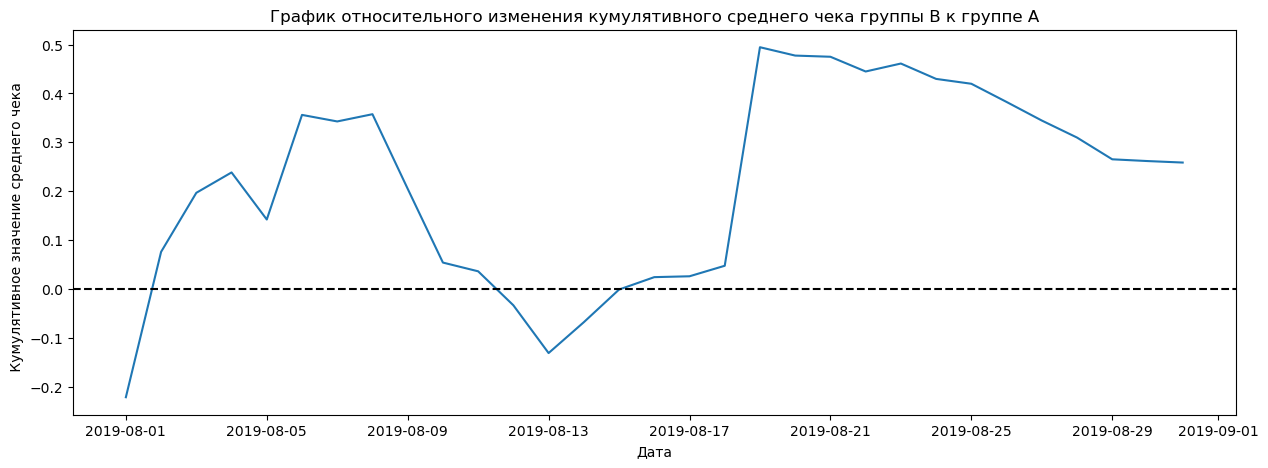

In [35]:

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel(' Кумулятивное значение среднего чека   '); 

Результаты теста значительно менялись только в середине.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

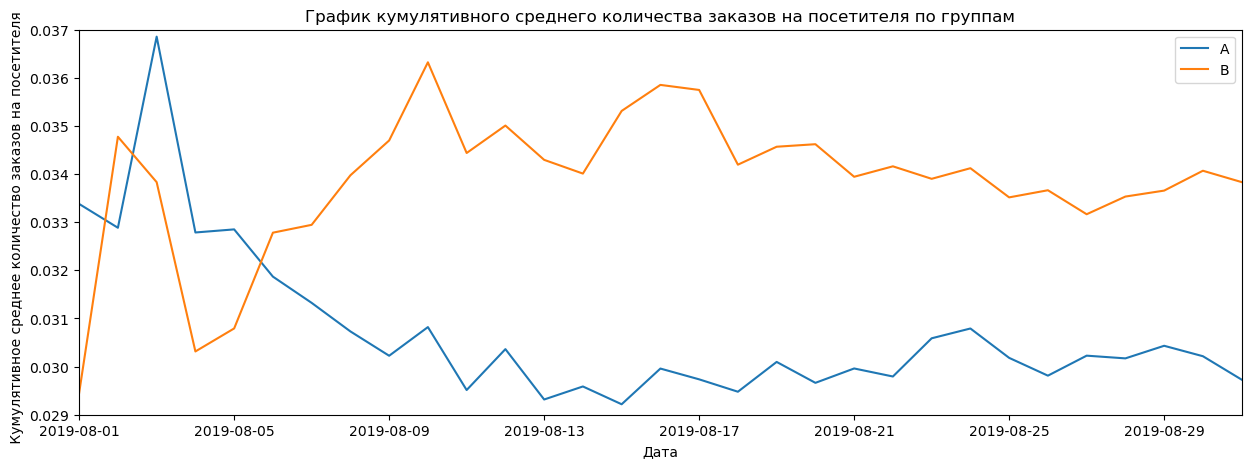

In [36]:

# считаем кумулятивное среднее количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.029, 0.037])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel(' Кумулятивное среднее количество заказов на посетителя   ');

Сначала группа А вырвалась вперед и затем просела и зафиксировалась.Затем кумулятивное среднее количество заказов на посетителя группы В вырвалось вперёд и тоже зафиксировалось.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.  Выводы и предположения.

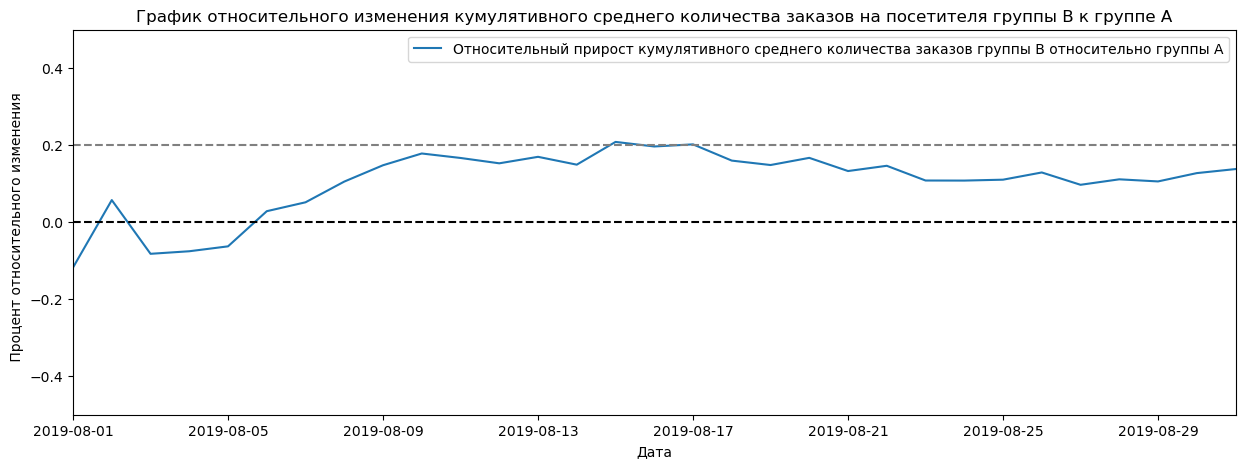

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel(' Процент относительного изменения   '); 

С самого начала теста группа B лидировала и завиксировалась на 15% относительно группы А.

#### Построение точечного графика количества заказов по пользователям. Выводы и предположения.

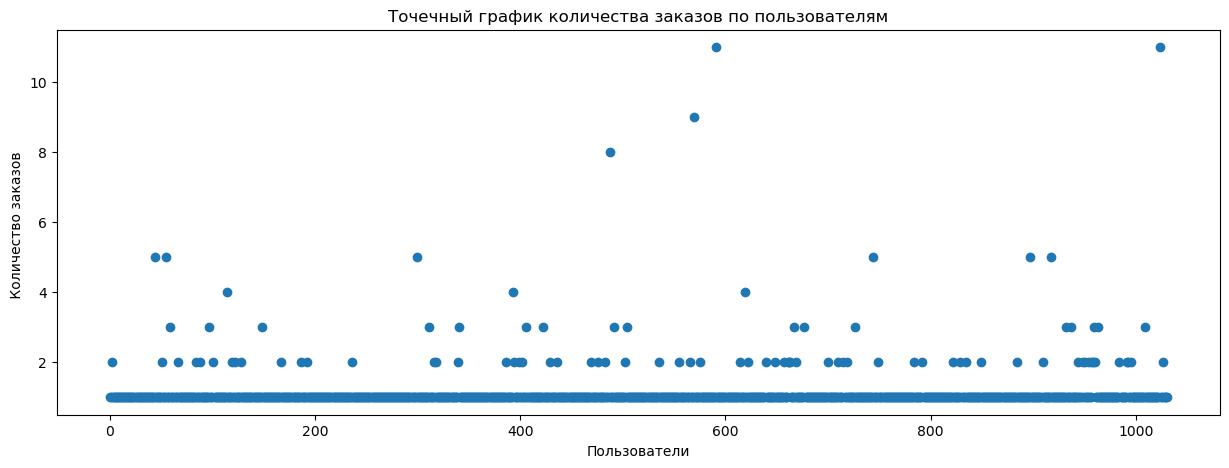

In [38]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']


# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))



plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel(' Количество заказов  '); 

 Пользователи  в основном заказывают до 2 раз.

#### Расчёт 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [39]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     
[2. 4.]


Не более  5 % совершали более двух заказов. Также не более 1% сделали больше 4 заказов. В качестве границы для определения аномальных пользователей установим значение 2. 

#### Построение точечного графика стоимостей заказов. Выводы и предположения.

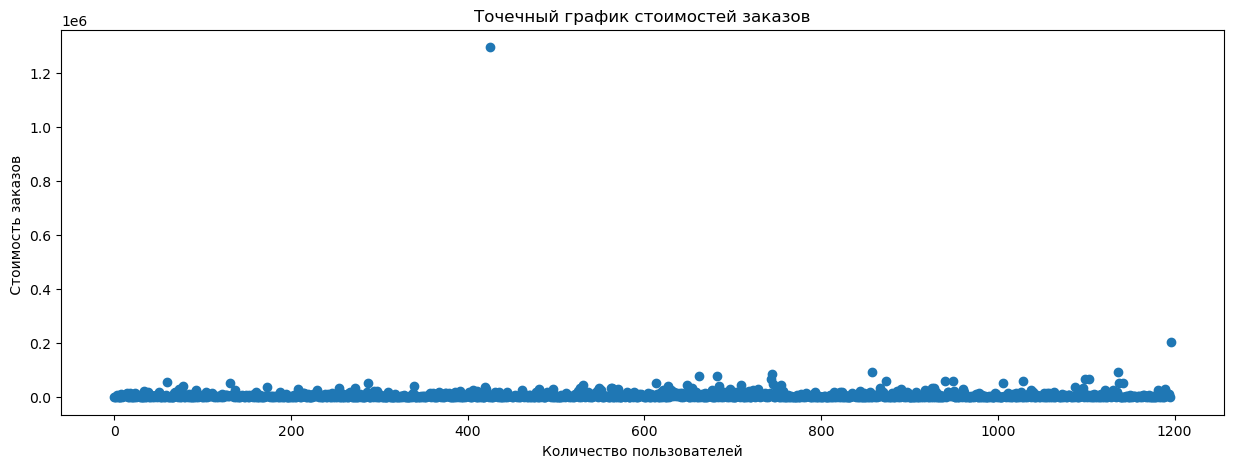

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel(' Стоимость заказов  ');

Есть выбросы - заказ свыше 1,2 млн. руб и вероятно заказ выше 0,2 млн. руб. 

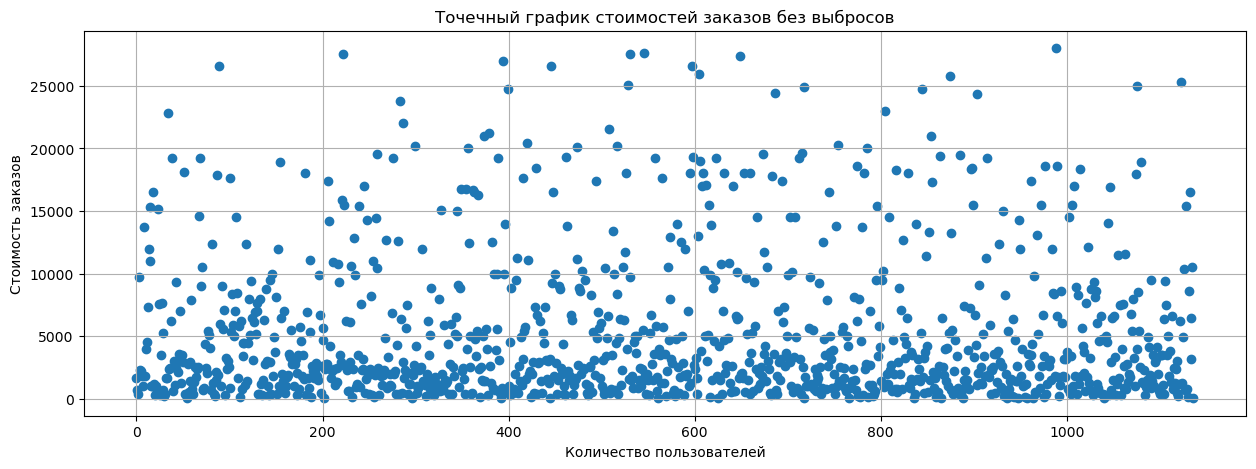

In [41]:
orders_bez_vbrosov = orders[orders['revenue']<=28000]['revenue']
xn_values = pd.Series(range(0,len(orders_bez_vbrosov)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов без выбросов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, orders_bez_vbrosov);


Заказы достаточно разнородны.

#### Расчёт 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [42]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [ 95, 99])) 

   transactionId   visitorId       date  revenue group
0  3667963787     3312258926 2019-08-15  1650     B   
1  2804400009     3642806036 2019-08-15  730      B   
2  2961555356     4069496402 2019-08-15  400      A   
3  3797467345     1196621759 2019-08-15  9759     B   
4  2282983706     2322279887 2019-08-15  2308     B   
5  182168103      935554773  2019-08-15  2210     B   
6  398296753      2900797465 2019-08-15  1860     B   
7  2626614568     78758296   2019-08-15  1044     A   
8  1576988021     295230930  2019-08-15  13710    A   
9  1506739906     1882260405 2019-08-15  1855     B   
[28000.  58233.2]


Лишь 5 процентов заказов имели стоимость выше 28000 и только 1 процент выше 58233,2 руб. В качестве границы для определения аномальных заказов установим значение 28000.

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.

Сформулируем гипотезы для расчёта по «сырым» данным. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Применим к проверке критерий Манна-Уитни. Установим alpha = 0.05

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

 

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
               visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
               visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display('Относительный прирост среднего количества заказов группы В = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))




'p-value = 0.01679'

'Относительный прирост среднего количества заказов группы В = 0.138'

 p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост среднего группы B  к кумулятивному среднему количеству заказов группы А равен 13.8%.


 #### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

Сформулируем гипотезы для расчёта по «сырым» данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Применим к проверке критерий Манна-Уитни. Установим alpha = 0.05



In [45]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительное различие в среднем чеке между группами = 0.259


 p-value = 0.729, что больше 0,05 статистически значимых различий в среднем чеке между группами нет. Относительное различие в среднем чеке между группами 25.9 % 

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.

Сформулируем гипотезы для расчёта по «очищенным» данным. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Применим к проверке критерий Манна-Уитни. Установим alpha = 0.05

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [47]:

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов группы В = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.01304
Относительный прирост среднего количества заказов группы В = 0.173


Альтернативная гипотеза (различия в среднем числе заказов между группами есть) - подтвердилась. Статистическая значимость достигнута. Группа В значительно лучше группы А. Аналогичный результат был получен и по «сырым» данным.


#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

Сформулируем гипотезы для расчёта по «очищенным» данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Применим к проверке критерий Манна-Уитни. Установим alpha = 0.05

In [48]:
print(
    ' p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    " Относительное различие в среднем чеке между группами = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

 p-value = 0.738
 Относительное различие в среднем чеке между группами = -0.020


После удаления выбросов в данных стало меньше шума. P-value увеличилось. Разница между группами сократилась с 25.9% до 2 %. 

#### Решение по результатам теста с объяснением . 

 По результатам решённых  задач можно сделать вывод:
1.Есть статистически значимое различие в среднем числе заказов между группами как по сырым данным, так и после фильтрации аномалий.
2. Как по сырым данным, так и после фильтрации аномалий подтвердилась нулевая гипотеза: различий в среднем чеке между группами нет. Относительное различие в среднем чеке после фильтрации аномалий, составляет всего 2%

График  относительного изменения кумулятивного среднего количества заказов на посетителя  между группами сообщает, что результаты группы B лучше группы A: и зафиксировались чуть ниже среднего значения.

Остановить тест, зафиксировать победу  группы B.
Группа B статистически значимо лучше группы A по обеим метрикам, а график относительного изменения кумулятивного среднего количества заказов на посетителя говорит о фиксации результата.
